### **Basic Librairies, Text Processing**

In [44]:
# Basic Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

# Text Processing
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from bs4 import BeautifulSoup
import re,string,unicodedata
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

### **Load Data**

In [45]:
FILE_NAME = './sample_data/sarcasm.json'
def getData():
    for line in open(FILE_NAME, 'r'):
        yield eval(line)
df = pd.DataFrame(list(getData()))     

In [46]:
df

,is_sarcastic,headline,article_link
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...
...,...,...,...
28614,1,jews to celebrate rosh hashasha or something,https://www.theonion.com/jews-to-celebrate-ros...
28615,1,internal affairs investigator disappointed con...,https://local.theonion.com/internal-affairs-in...
28616,0,the most beautiful acceptance speech this week...,https://www.huffingtonpost.com/entry/andrew-ah...
28617,1,mars probe destroyed by orbiting spielberg-gat...,https://www.theonion.com/mars-probe-destroyed-...


# More can be found [Kaggle Sarcasm Detection](https://www.kaggle.com/rmisra/news-headlines-dataset-for-sarcasm-detection)


To overcome the limitations related to noise in Twitter datasets, this News Headlines dataset for Sarcasm Detection is collected from two news website. TheOnion aims at producing sarcastic versions of current events and we collected all the headlines from News in Brief and News in Photos categories (which are sarcastic). We collect real (and non-sarcastic) news headlines from HuffPost.

This new dataset has following advantages over the existing Twitter datasets:

* Since news headlines are written by professionals in a formal manner, there are no spelling mistakes and informal usage. This reduces the sparsity and also increases the chance of finding pre-trained embeddings.

* Furthermore, since the sole purpose of TheOnion is to publish sarcastic news, we get high-quality labels with much less noise as compared to Twitter datasets.

* Unlike tweets which are replies to other tweets, the news headlines we obtained are self-contained. This would help us in teasing apart the real sarcastic elements.


### **Examples**

#### ***Not Sarcastic***

In [47]:
not_sarcastic_df = df[df['is_sarcastic'] == 0][['headline', 'article_link']]
not_sarcastic_df

,headline,article_link
1,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...
2,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...
5,my white inheritance,https://www.huffingtonpost.com/entry/my-white-...
6,5 ways to file your taxes with less stress,https://www.huffingtonpost.com/entry/5-ways-to...
9,lots of parents know this scenario,https://www.huffingtonpost.comhttp://pubx.co/6...
...,...,...
28607,what our grieving family needs from loved ones...,https://www.huffingtonpost.com/entry/what-our-...
28608,stephen colbert attempts to list everything tr...,https://www.huffingtonpost.com/entry/stephen-c...
28609,bakery owner vows to stop making wedding cakes...,https://www.huffingtonpost.com/entry/jack-phil...
28613,how san antonio's dominant defense is fueling ...,https://www.huffingtonpost.com/entry/san-anton...


In [48]:
not_sarcastic_df.iloc[:2, :]

,headline,article_link
1,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...
2,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...


* Dem Rep. Totally Nails Why Congress Is Falling Short On Gender, Racial Equality [Here](https://www.huffpost.com/entry/donna-edwards-inequality_n_57455f7fe4b055bb1170b207).

* Eat Your Veggies: 9 Deliciously Different Recipes [Here](https://www.huffpost.com/entry/eat-your-veggies-9-delici_b_8899742).

#### ***Sarcastic***

In [49]:
sarcastic_df = df[df['is_sarcastic'] == 1][['headline', 'article_link']]
sarcastic_df

,headline,article_link
0,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...
3,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...
4,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...
7,richard branson's global-warming donation near...,https://www.theonion.com/richard-bransons-glob...
8,shadow government getting too large to meet in...,https://politics.theonion.com/shadow-governmen...
...,...,...
28612,polish rapper under fire for use of the word '...,https://entertainment.theonion.com/polish-rapp...
28614,jews to celebrate rosh hashasha or something,https://www.theonion.com/jews-to-celebrate-ros...
28615,internal affairs investigator disappointed con...,https://local.theonion.com/internal-affairs-in...
28617,mars probe destroyed by orbiting spielberg-gat...,https://www.theonion.com/mars-probe-destroyed-...


In [50]:
sarcastic_df.iloc[:2, :]

,headline,article_link
0,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...
3,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...


* Thirtysomething Scientists Unveil Doomsday Clock Of Hair Loss [Here](https://www.theonion.com/thirtysomething-scientists-unveil-doomsday-clock-of-hai-1819586205).
* Inclement Weather Prevents Liar From Getting To Work [Here](https://local.theonion.com/inclement-weather-prevents-liar-from-getting-to-work-1819576031).

### **Check if the Dataset is Unbalanced**

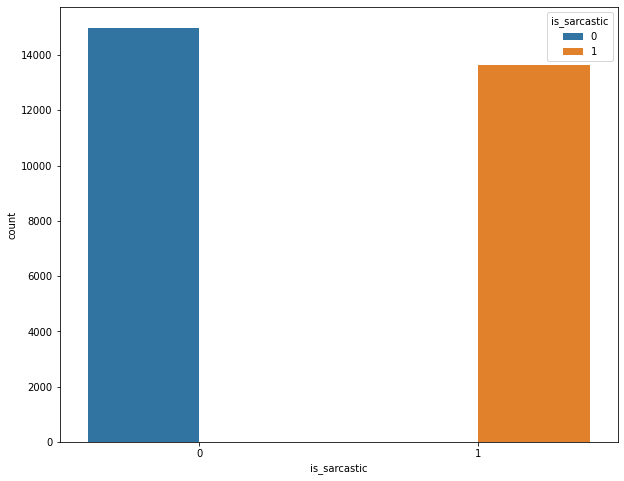

In [51]:
plt.figure(figsize=(10, 8))
ax=sns.countplot(x="is_sarcastic",  hue="is_sarcastic", data=df)

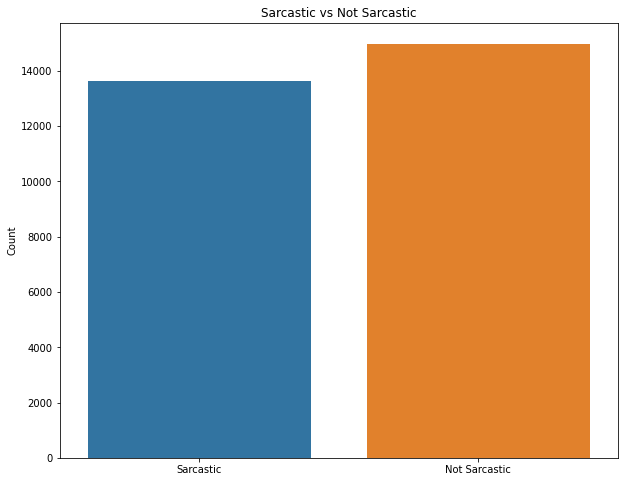

In [52]:
df['sarcastic_label'] = df['is_sarcastic'].apply(lambda v: 'Sarcastic' if v == 1 else 'Not Sarcastic')
plt.figure(figsize=(10, 8))
ax=sns.countplot(x="sarcastic_label", data=df)
plt.xlabel('')
plt.ylabel('Count')
plt.title("Sarcastic vs Not Sarcastic")
plt.show()

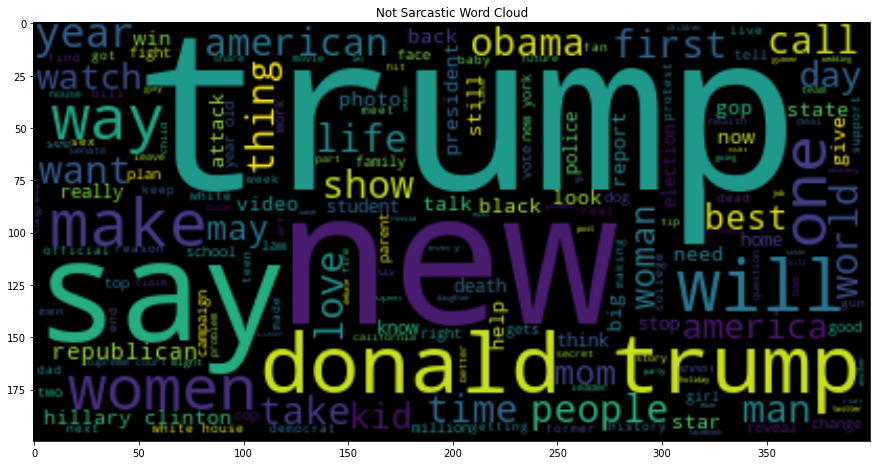

In [53]:
headlines = df[df['is_sarcastic'] == 0]['headline'].str.cat(sep=' ')
wordcloud = WordCloud().generate(headlines)
plt.figure(figsize=(15, 20))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Not Sarcastic Word Cloud")
plt.show()

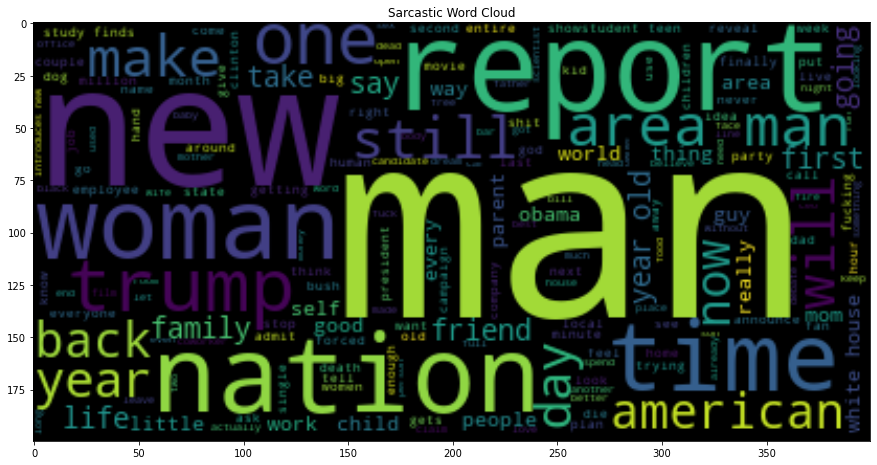

In [54]:
headlines = df[df['is_sarcastic'] == 1]['headline'].str.cat(sep=' ')
wordcloud = WordCloud().generate(headlines)
plt.figure(figsize=(15, 20))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Sarcastic Word Cloud")
plt.show()

In [55]:
sarcastic_headlines = df[df['is_sarcastic'] == 1]['headline'].str.cat(sep=' ')
sarcastic_headlines_freq = nltk.FreqDist(sarcastic_headlines.split())
pd.DataFrame(sarcastic_headlines_freq.most_common(), columns=['Word', 'Frequency'])

,Word,Frequency
0,to,4980
1,of,3790
2,in,2104
3,for,1736
4,on,1286
...,...,...
23923,'polack',1
23924,rosh,1
23925,hashasha,1
23926,orbiting,1


In [56]:
not_sarcastic_headlines = df[df['is_sarcastic'] == 0]['headline'].str.cat(sep=' ')
not_sarcastic_headlines_freq = nltk.FreqDist(not_sarcastic_headlines.split())
pd.DataFrame(not_sarcastic_headlines_freq.most_common(), columns=['Word', 'Frequency'])

,Word,Frequency
0,the,4593
1,to,4065
2,of,2462
3,a,2443
4,in,2417
...,...,...
25016,pokémon,1
25017,altogether,1
25018,pro-gay,1
25019,antonio's,1


### **Comments**
From the DataFrame words frequency above about Sarcastic and Not Sarcastic Headline, it appears that we have a lof stop word. 

In [57]:
# Download the nlk stopword
nltk.download('stopwords')
stop = set(stopwords.words('english'))

def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

# Removing URL's
def remove_between_square_brackets(text):
    return re.sub(r'http\S+', '', text)
    
#Removing the stopwords from text
def remove_stopwords(text):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stop:
            final_text.append(i.strip())
    return " ".join(final_text)

# Removing the noisy text
def clean_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    text = remove_stopwords(text)
    return text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [58]:
sarcastic_headlines_freq = nltk.FreqDist(clean_text(sarcastic_headlines).split())
sarcastic_df_freq_word = pd.DataFrame(sarcastic_headlines_freq.most_common(), columns=['Word', 'Frequency'])
sarcastic_df_freq_word

,Word,Frequency
0,man,1143
1,new,973
2,area,487
3,report:,428
4,woman,353
...,...,...
23775,'polack',1
23776,rosh,1
23777,hashasha,1
23778,orbiting,1


In [59]:
len(sarcastic_df_freq_word)

23780

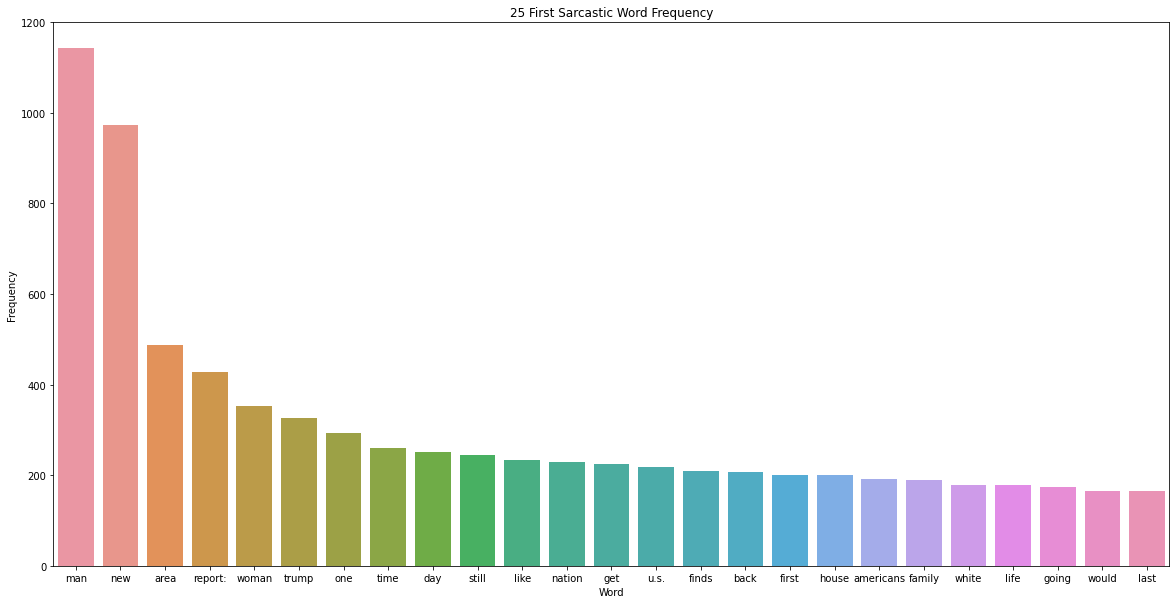

In [60]:
plt.figure(figsize=(20, 10))
barplot = sns.barplot(
    data=sarcastic_df_freq_word.iloc[0:25, :], 
    x="Word", 
    y="Frequency")
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.title("25 First Sarcastic Word Frequency")
plt.show()


In [61]:
not_sarcastic_headlines_freq = nltk.FreqDist(clean_text(not_sarcastic_headlines).split())
not_sarcastic_df_freq_word = pd.DataFrame(not_sarcastic_headlines_freq.most_common(), columns=['Word', 'Frequency'])
not_sarcastic_df_freq_word

,Word,Frequency
0,trump,957
1,new,664
2,donald,453
3,trump's,364
4,says,346
...,...,...
24868,pokémon,1
24869,altogether,1
24870,pro-gay,1
24871,antonio's,1


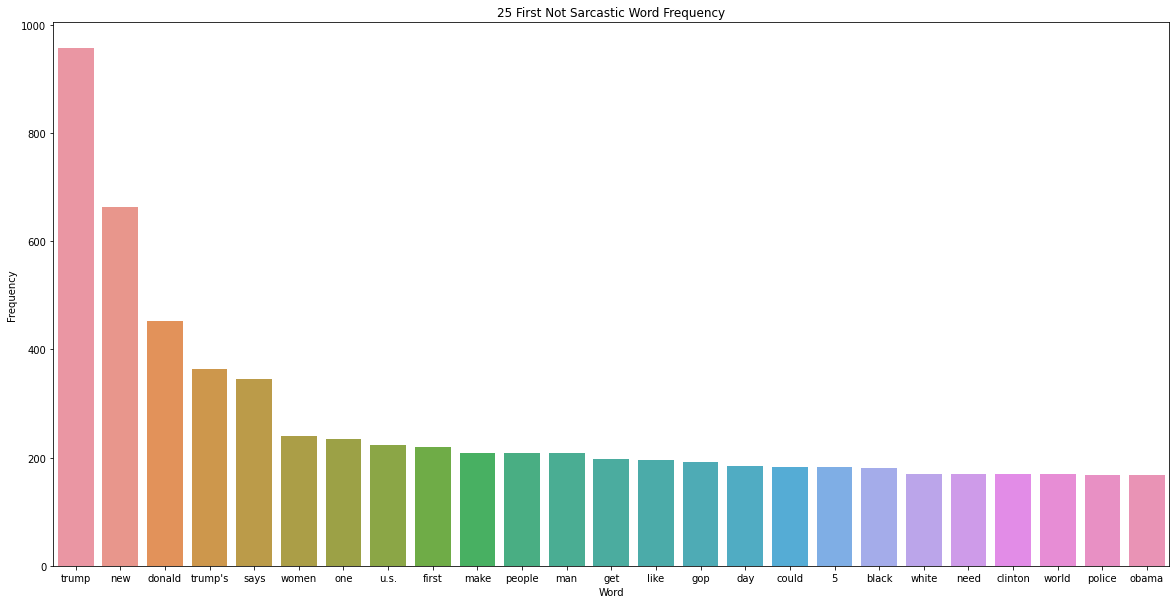

In [62]:
plt.figure(figsize=(20, 10))
barplot = sns.barplot(
    data=not_sarcastic_df_freq_word.iloc[0:25, :], 
    x="Word", 
    y="Frequency")
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.title("25 First Not Sarcastic Word Frequency")
plt.show()

   Number of Not Sarcastic Word  Number of Sarcastic Word
0                         24873                     23780


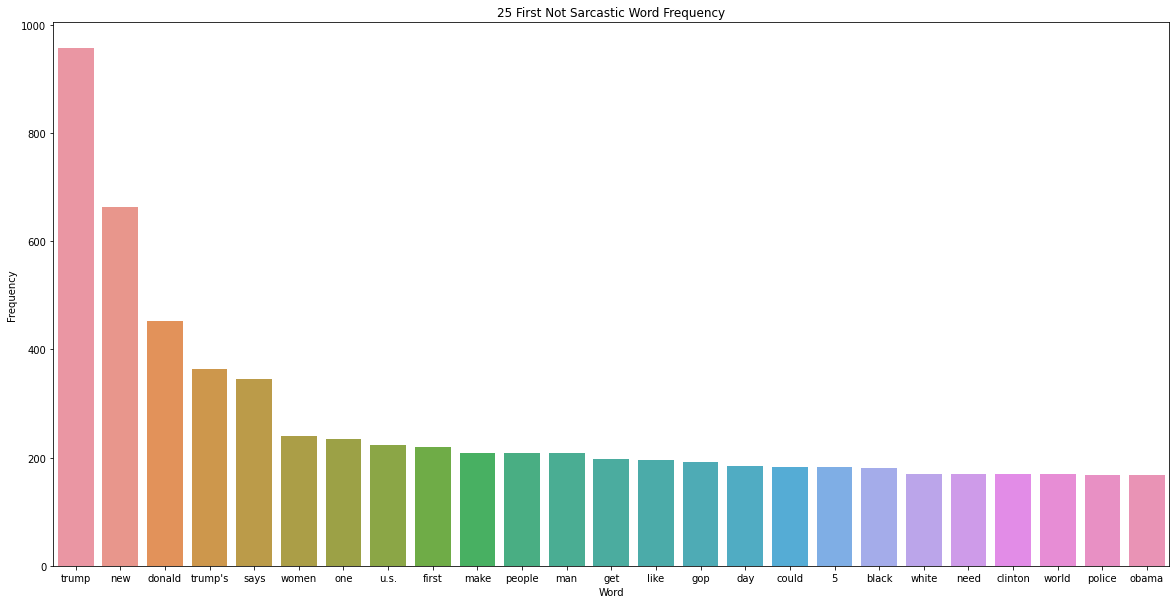

In [63]:
len(sarcastic_df_freq_word)
len(not_sarcastic_df_freq_word)
df_sarc_vs_not = pd.DataFrame()
df_sarc_vs_not['Number of Not Sarcastic Word'] = [len(not_sarcastic_df_freq_word)]
df_sarc_vs_not['Number of Sarcastic Word'] = [len(sarcastic_df_freq_word)]


df_sarc_vs_not_2 = pd.DataFrame()

print(df_sarc_vs_not)



plt.figure(figsize=(20, 10))
barplot = sns.barplot(
    data=not_sarcastic_df_freq_word.iloc[0:25, :], 
    x="Word", 
    y="Frequency")
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.title("25 First Not Sarcastic Word Frequency")
plt.show()

### **PreProcessing**

In [64]:
df['cleaned_headline']=df['headline'].apply(clean_text)

In [65]:
df

,is_sarcastic,headline,article_link,sarcastic_label,cleaned_headline
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...,Sarcastic,thirtysomething scientists unveil doomsday clo...
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...,Not Sarcastic,dem rep. totally nails congress falling short ...
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...,Not Sarcastic,eat veggies: 9 deliciously different recipes
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...,Sarcastic,inclement weather prevents liar getting work
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...,Sarcastic,mother comes pretty close using word 'streamin...
...,...,...,...,...,...
28614,1,jews to celebrate rosh hashasha or something,https://www.theonion.com/jews-to-celebrate-ros...,Sarcastic,jews celebrate rosh hashasha something
28615,1,internal affairs investigator disappointed con...,https://local.theonion.com/internal-affairs-in...,Sarcastic,internal affairs investigator disappointed con...
28616,0,the most beautiful acceptance speech this week...,https://www.huffingtonpost.com/entry/andrew-ah...,Not Sarcastic,beautiful acceptance speech week came queer ko...
28617,1,mars probe destroyed by orbiting spielberg-gat...,https://www.theonion.com/mars-probe-destroyed-...,Sarcastic,mars probe destroyed orbiting spielberg-gates ...


In [66]:
corpus = [word.split() for word in df.cleaned_headline.values]

In [67]:
corpus[:3]

[['thirtysomething',
  'scientists',
  'unveil',
  'doomsday',
  'clock',
  'hair',
  'loss'],
 ['dem',
  'rep.',
  'totally',
  'nails',
  'congress',
  'falling',
  'short',
  'gender,',
  'racial',
  'equality'],
 ['eat', 'veggies:', '9', 'deliciously', 'different', 'recipes']]

In [68]:
# Compute Max Len 
max_len = 0
for words_per_sentence in corpus:
  max_len = np.max([max_len, len(words_per_sentence)])

In [69]:
print(f'Max Lenght of Sentences is {max_len}')

Max Lenght of Sentences is 106


In [70]:
# Text Tokenization

In [71]:
len(sarcastic_df_freq_word)

23780

In [72]:
len(not_sarcastic_df_freq_word)

24873

In [73]:
num_words_headline = len(sarcastic_df_freq_word) + len(not_sarcastic_df_freq_word)
tokenizer = Tokenizer(num_words=num_words_headline)
tokenizer.fit_on_texts(corpus)
tokenized_corpus = tokenizer.texts_to_sequences(corpus)
x = pad_sequences(tokenized_corpus, maxlen = max_len)

In [74]:
x

array([[    0,     0,     0, ...,  2338,   560,   946],
       [    0,     0,     0, ..., 11459,  1992,  1812],
       [    0,     0,     0, ..., 16800,   481,  1359],
       ...,
       [    0,     0,     0, ...,   959,   673,  1656],
       [    0,     0,     0, ..., 38080,   827,  5970],
       [    0,     0,     0, ...,  2972,   171,    88]], dtype=int32)

In [75]:
vocab_size = len(tokenizer.word_index) + 1
vocab_size

38081

# **Designe Neural Architecture Model**

In [76]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Embedding, SpatialDropout1D, LSTM, GRU, GlobalMaxPool1D, GlobalAveragePooling1D
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

import os

## **Split to Train and Valid Set**

In [90]:
target = df.is_sarcastic
x_train, x_valid, y_train, y_valid = train_test_split(x, target, test_size =0.3, random_state = 42, stratify=target)

#### **Show Plot Training vs Validation**

In [121]:
def plot_graphs(history, string):
  plt.figure(figsize=(8, 8))
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.title("Dense Model")
  plt.show()

#### **Show Meetrics**

In [120]:
def showMeetrics(model, x_valid, y_valid):
  y_pred = model.predict_classes(x_valid)
  cm = confusion_matrix(y_valid, y_pred)
  cm = pd.DataFrame(
    cm, 
    index=['Not Sarcastic','Sarcastic'], 
    columns = ['Not Sarcastic','Sarcastic']
  )
  plt.figure(figsize = (10,10))
  sns.heatmap(cm, 
            cmap="Blues", 
            linecolor='black', 
            linewidth = 1, 
            annot = True, 
            fmt='', 
            xticklabels = ['Not Sarcastic','Sarcastic'],
            yticklabels = ['Not Sarcastic','Sarcastic']
  )
  plt.title("Confuson Matrix Dense Model")
  plt.show()
  from sklearn.metrics import classification_report
  classification_report = classification_report(y_true=y_valid, y_pred = y_pred)
  print('Classification Report')
  print(classification_report)

#### **Define Optimizer Algorithme**

In [80]:
ADAM = tf.keras.optimizers.Adam(learning_rate=0.0001, 
                                  beta_1=0.9, beta_2=0.999, amsgrad=False)

## **Fit Neural Network**

In [81]:
def fitModel(model, epochs, output_dir):
   # Out for ModelCheck Point 
  modelcheckpoint = ModelCheckpoint(filepath=output_dir+"/weights.{epoch:02d}.hdf5")
  if not os.path.exists(output_dir):
      os.makedirs(output_dir)
  # Train and Fit
  history = model.fit(x_train, y_train, epochs=epochs, verbose=1, 
                    validation_data=(x_valid, y_valid), 
                    callbacks=[modelcheckpoint])
     
  return history

## **Build Dense Neural Network**

In [86]:
len(set(tokenizer.word_index)) + 1 

38081

In [115]:
def buildDenseModel():    
  # it's about 38235
  n_unique_words = len(set(tokenizer.word_index)) + 1 
  # using the fourth root of 38235 should be 14
  embedding_dim = 12
  # Dense layer neurones
  n_dense = 12
 
  model = tf.keras.Sequential([
      Embedding(n_unique_words, embedding_dim),
      GlobalAveragePooling1D(),
      Dense(n_dense, activation='relu'),
      Dropout(0.3),
      Dense(1, activation='sigmoid')
  ])   
 
  model.compile(loss='binary_crossentropy',
                optimizer=ADAM, metrics=['accuracy']) 

  model.summary()
  return model

In [116]:
# Create Dense Model
dense_model = buildDenseModel()

# Fit the Model 
history = fitModel(
    model=dense_model, 
    epochs=65, 
    output_dir='./sample_data/output_model/sarcasm/biDense2')

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, None, 12)          456972    
_________________________________________________________________
global_average_pooling1d_1 ( (None, 12)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 12)                156       
_________________________________________________________________
dropout_4 (Dropout)          (None, 12)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 13        
Total params: 457,141
Trainable params: 457,141
Non-trainable params: 0
_________________________________________________________________
Epoch 1/65
627/627 [==============================] - 4s 7ms/step - loss: 0.6920 - accuracy: 0.5235 - val_loss: 0.

## **Evaluate Dense Neural Network**

<Figure size 576x576 with 0 Axes>

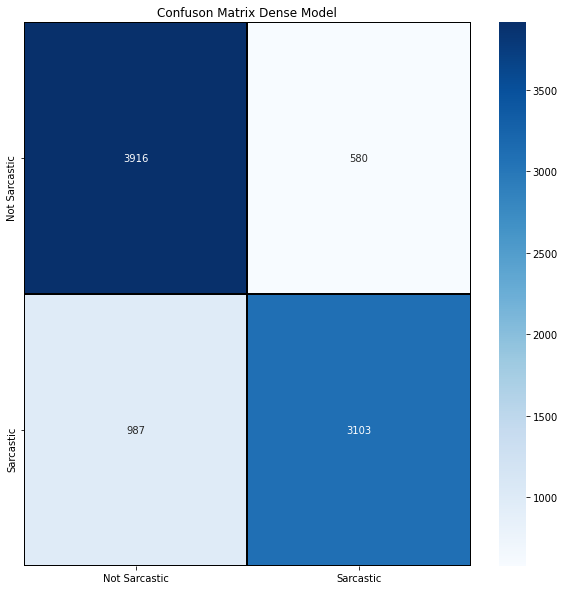

Classification Report
              precision    recall  f1-score   support

           0       0.80      0.87      0.83      4496
           1       0.84      0.76      0.80      4090

    accuracy                           0.82      8586
   macro avg       0.82      0.81      0.82      8586
weighted avg       0.82      0.82      0.82      8586



In [122]:
# Evaluate the Model, F1 Score...
plt.figure(figsize = (8,8))
showMeetrics(dense_model, x_valid=x_valid, y_valid=y_valid)   

<Figure size 576x576 with 0 Axes>

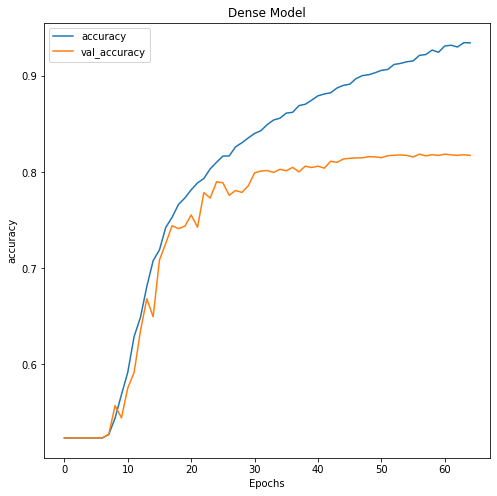

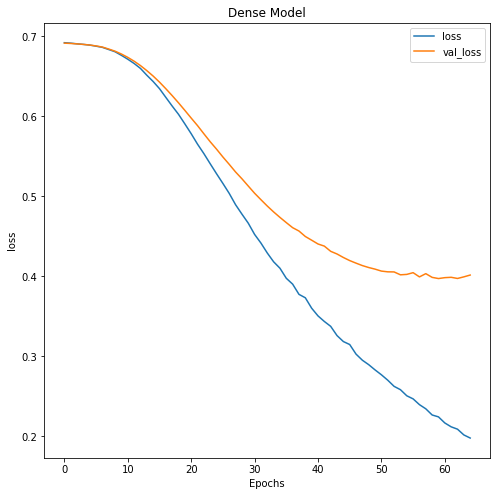

In [123]:
# Plot Loss and Accuracy for Training and Validation
plt.figure(figsize = (8,8))
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

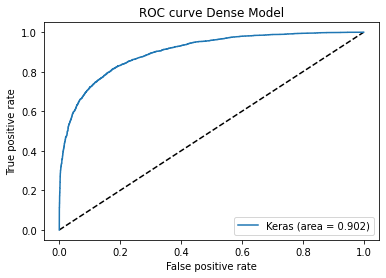

In [124]:
from sklearn import metrics
from sklearn.metrics import roc_curve
y_pred_keras = dense_model.predict(x_valid).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_valid, y_pred_keras)


from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)


plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve Dense Model')
plt.legend(loc='best')
plt.show()